In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import statsmodels as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
!ln -s /content/gdrive/My\ Drive/agio /agio

In [6]:
%cd /agio
!ls

/content/gdrive/My Drive/agio
 311_SR_Data_Dictionary_2018.xlsx   nyc_311_EDA.ipynb
 agio				    nyc_311_getData.ipynb
 city_attributes.csv		    nyc_raw_subset.csv
 complaints_totals.csv		    nyc_weather.csv
 complaints_totals.gsheet	    pressure.csv
 daily_weather.csv		    temperature.csv
 humidity.csv			    weather_description.csv
 nyc_311_2016.csv		    weather_eda.ipynb
'nyc_311_>2016_samp.csv'	    wind_direction.csv
 nyc_311_data.csv		    wind_speed.csv


In [10]:
# calls = pd.read_csv('nyc_311_2016.csv')

calls.rename(columns={'dt':'dt_'}, inplace=True)

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12175484 entries, 0 to 12175483
Data columns (total 18 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   unique_key                      int64 
 1   created_date                    object
 2   closed_date                     object
 3   agency                          object
 4   agency_name                     object
 5   complaint_type                  object
 6   descriptor                      object
 7   location_type                   object
 8   incident_zip                    object
 9   cross_street_1                  object
 10  cross_street_2                  object
 11  status                          object
 12  due_date                        object
 13  resolution_action_updated_date  object
 14  borough                         object
 15  open_data_channel_type          object
 16  cnt                             int64 
 17  dt_                             object
dtype

In [11]:
calls.head()

unique_key         created_date  ... cnt         dt_
0    42147537  2019-04-05 14:27:21  ...   1  2019-04-05
1    42147538  2019-04-05 23:00:01  ...   1  2019-04-05
2    42147539  2019-04-05 09:38:05  ...   1  2019-04-05
3    42147540  2019-04-05 09:49:18  ...   1  2019-04-05
4    42147541  2019-04-05 11:58:43  ...   1  2019-04-05

[5 rows x 18 columns]

In [14]:
temps = pd.read_csv('daily_weather.csv')
temps.rename(columns={'dt':'dt_'}, inplace=True)

In [15]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt_           1854 non-null   object 
 1   temp_max      1854 non-null   float64
 2   temp_median   1854 non-null   float64
 3   temp_min      1854 non-null   float64
 4   temp_mean     1854 non-null   float64
 5   humid_mean    1854 non-null   float64
 6   pres_mean     1854 non-null   float64
 7   wnd_spd_mean  1854 non-null   float64
 8   wnd_dir_mean  1854 non-null   float64
dtypes: float64(8), object(1)
memory usage: 130.5+ KB


In [16]:
temps.head()

dt_    temp_max  temp_median  ...    pres_mean  wnd_spd_mean  wnd_dir_mean
0  2012-10-01  288.961048   288.564730  ...  1012.000000      6.363636    261.363636
1  2012-10-02  294.850000   289.951841  ...  1012.000000      4.833333    268.125000
2  2012-10-03  292.880000   290.035000  ...  1015.541667      2.416667    118.916667
3  2012-10-04  295.270000   290.735000  ...  1016.772727      1.875000     71.958333
4  2012-10-05  296.270000   293.900000  ...  1019.250000      1.375000     49.583333

[5 rows x 9 columns]

In [30]:
daily = calls[['dt_', 'cnt']].groupby('dt_').sum()
daily.index = pd.to_datetime(daily.index)
daily.head()

cnt
dt_              
2016-01-01   4315
2016-01-02   4569
2016-01-03   4806
2016-01-04   8988
2016-01-05  12035

In [579]:
data.tail()

cnt  temp_max  temp_median  ...  wnd_dir_mean  num_other  num_noise
dt_                                      ...                                    
2017-10-24  7658    296.23      294.190  ...    142.375000       6853        805
2017-10-25  7253    292.90      290.230  ...    249.916667       6314        939
2017-10-26  7627    288.06      286.075  ...    171.750000       6826        801
2017-10-27  7847    289.98      283.765  ...    105.916667       6574       1273
2017-10-28  6627    284.98      284.980  ...      0.000000       4061       2566

[5 rows x 11 columns]

In [84]:
daily_copy = daily.copy()
daily = daily[:'2019-12-01']

In [85]:
p_test = adfuller(daily.cnt.values)

print(f'ADF stat: {p_test[0]}\tp-value: {p_test[1]}')

ADF stat: -3.920647405740209	p-value: 0.0018880403011278316


In [580]:
add = seasonal_decompose(data['cnt'], model='additive', extrapolate_trend='freq')
add_df = pd.concat([add.seasonal, add.trend, add.resid, add.observed], axis=1)
add_df.columns = ['seasonal', 'add_trend', 'resid', 'actual_values']
add_df.head()

seasonal    add_trend        resid  actual_values
dt_                                                             
2016-01-01   143.653100  7843.969388 -3672.622487           4315
2016-01-02 -1031.459943  7747.280612 -2146.820670           4569
2016-01-03 -1285.905935  7650.591837 -1558.685901           4806
2016-01-04   527.629618  7184.714286  1275.656096           8988
2016-01-05   695.897287  7500.000000  3839.102713          12035

In [32]:
cmap = plt.get_cmap('viridis')
rndm = np.sort(np.random.randint(0, cmap.N-20, 10))
clrs = np.array(cmap.colors)[rndm]

Text(0.5, 1.0, 'Residual')

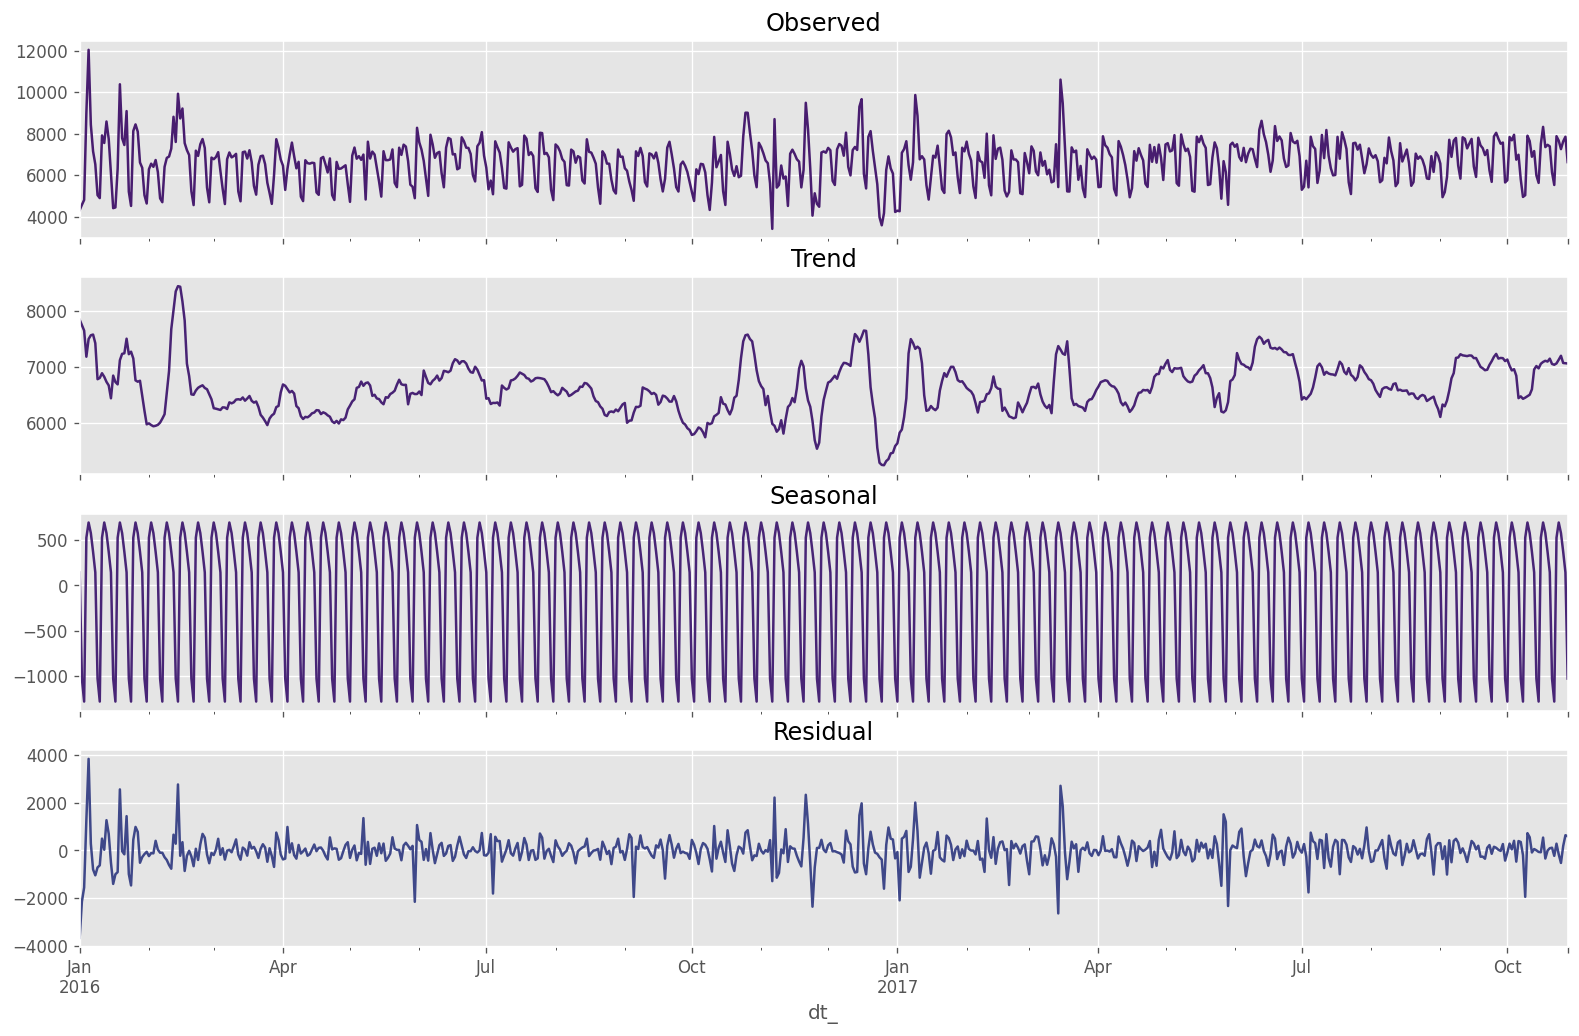

In [581]:
plt.rcParams.update({'figure.figsize':(16,10)})
fig, axes = plt.subplots(4, 1, sharex=True)

add.observed.plot(ax=axes[0], legend=False, color=[clrs[1]])
axes[0].set_title('Observed')
add.trend.plot(ax=axes[1], legend=False, color=[clrs[2]])
axes[1].set_title('Trend')
add.seasonal.plot(ax=axes[2], legend=False, color=[clrs[3]])
axes[2].set_title('Seasonal')
add.resid.plot(ax=axes[3], legend=False, color=[clrs[4]])
axes[3].set_title('Residual')

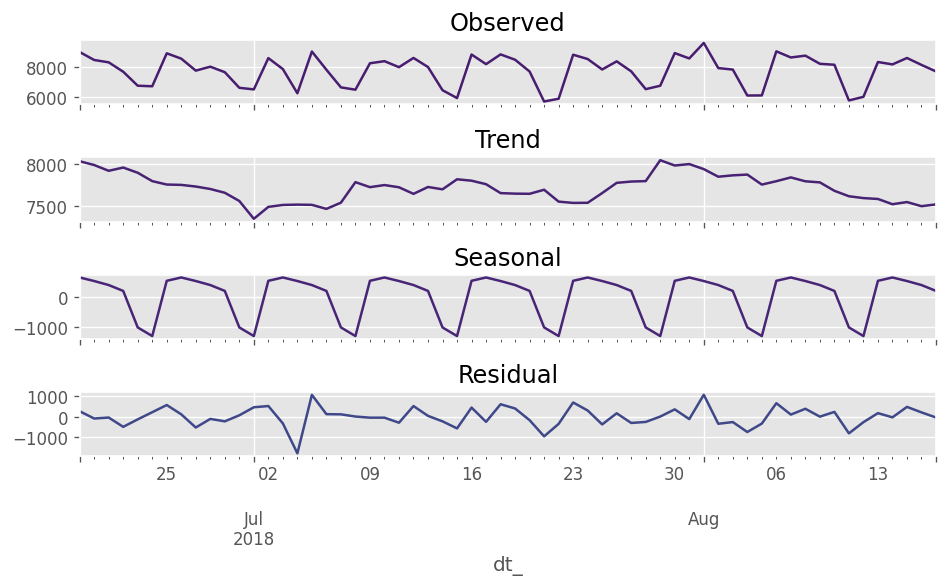

In [91]:
plt.rcParams.update({'figure.figsize':(8,5)})
fig, axes = plt.subplots(4, 1, sharex=True)

add.observed[900:960].plot(ax=axes[0], legend=False, color=[clrs[1]])
axes[0].set_title('Observed')
add.trend[900:960].plot(ax=axes[1], legend=False, color=[clrs[2]])
axes[1].set_title('Trend')
add.seasonal[900:960].plot(ax=axes[2], legend=False, color=[clrs[3]])
axes[2].set_title('Seasonal')
add.resid[900:960].plot(ax=axes[3], legend=False, color=[clrs[4]])
axes[3].set_title('Residual')
plt.tight_layout()

In [598]:
trend = add.trend

Text(0.49, 0.98, 'DIFFERENCING')

<Figure size 960x960 with 0 Axes>

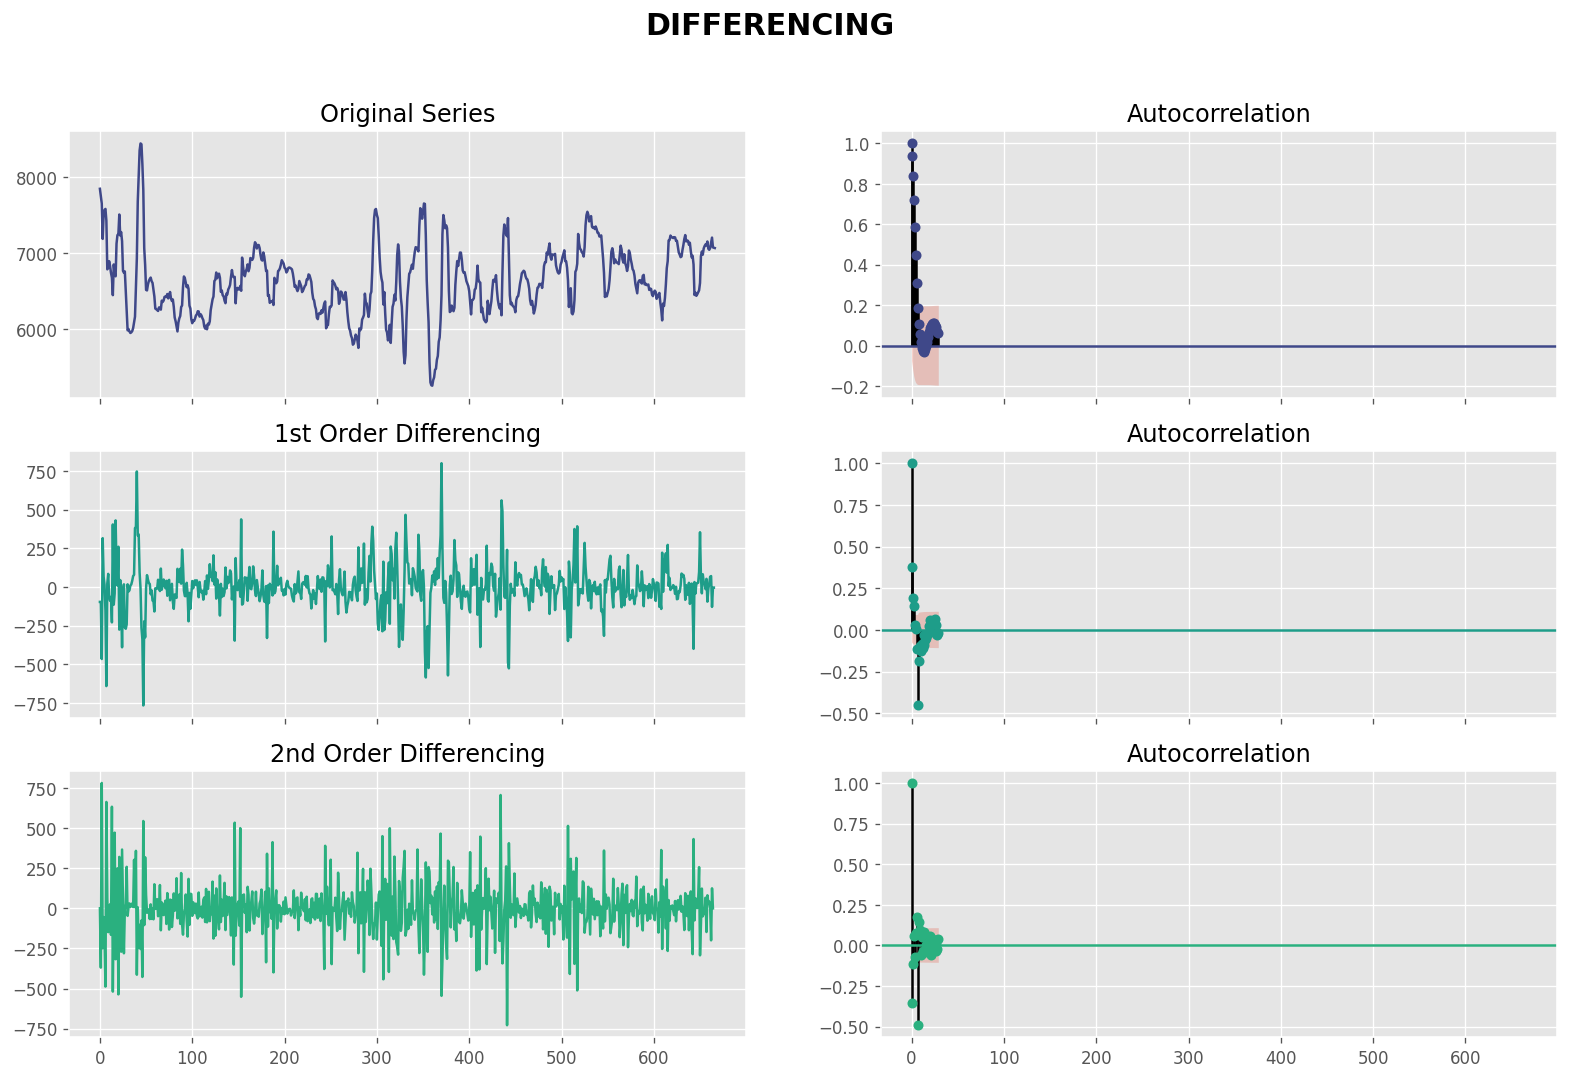

In [584]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(16,10)})

plt.figure(figsize=(8,8))
fig, axes = plt.subplots(3, 2, sharex=True)


# Original Series
axes[0, 0].plot(trend.values,color=clrs[4])
axes[0, 0].set_title('Original Series')
plot_acf(trend.values, color=clrs[4], ax=axes[0, 1]).suptitle('Original Series', fontsize=0)

# 1st Differencing
diff1 = trend.diff().dropna()
axes[1, 0].plot(diff1.values,color=clrs[5])
axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff1.values, color=clrs[5], ax=axes[1, 1]).suptitle('1st Order Differencing', fontsize=0)

# 2nd Differencing
diff2 = trend.diff().diff().dropna()
axes[2, 0].plot(diff2.values,color=clrs[6])
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff2.values, color=clrs[6], ax=axes[2, 1]).suptitle('2nd Order Differencing', fontsize=0)

plt.suptitle('DIFFERENCING', size=18, weight='bold', x=.49)

## autoregressive order `p`

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 0.98, '1st Order Differencing')

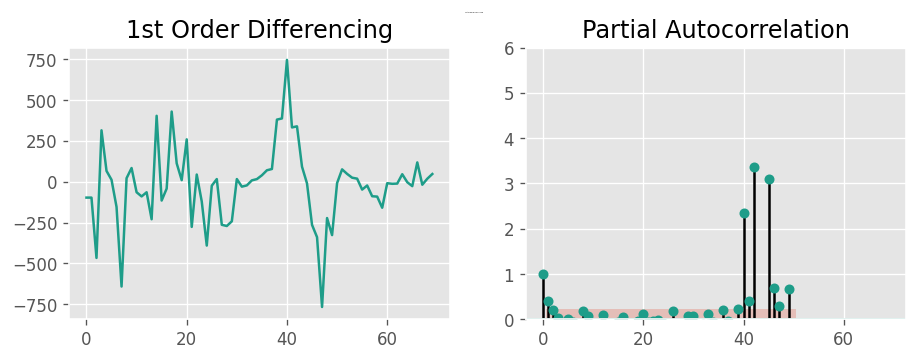

In [585]:
plt.rcParams.update({'figure.figsize':(9,3)})
size = 70
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1.values[:size], color=clrs[5])
axes[0].set_title('1st Order Differencing')
axes[1].set(ylim=(0,6))
plot_pacf(diff1.values[:size], lags=50, ax=axes[1], color=clrs[5]).suptitle('1st Order Differencing', fontsize=0)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 0.98, '2nd Order Differencing')

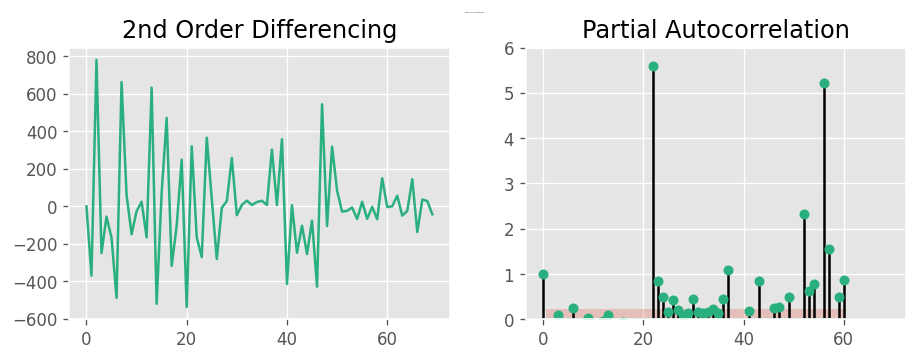

In [586]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
size = 70
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff2.values[:size], color=clrs[6])
axes[0].set_title('2nd Order Differencing')
axes[1].set(ylim=(0,6))
plot_pacf(diff2.values[:size], lags=60, ax=axes[1], color=clrs[6]).suptitle('2nd Order Differencing', fontsize=0)

## moving average order `q`

Text(0.5, 0.98, '1st Order Differencing')

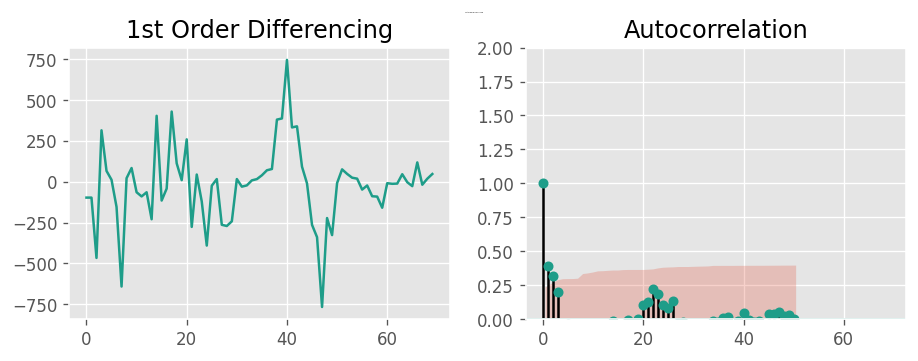

In [587]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
size = 70
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1.values[:size], color=clrs[5])
axes[0].set_title('1st Order Differencing')
axes[1].set(ylim=(0,2))
plot_acf(diff1.values[:size], lags=50, ax=axes[1], color=clrs[5]).suptitle('1st Order Differencing', fontsize=0)

Text(0.5, 0.98, '2nd Order Differencing')

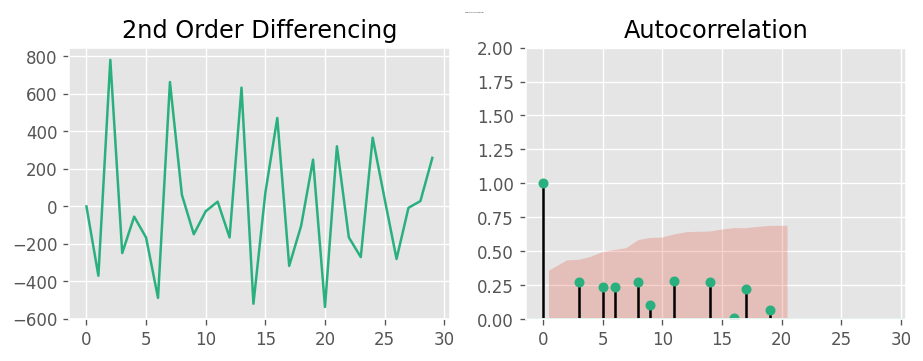

In [588]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
size = 30
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff2.values[:size], color=clrs[6])
axes[0].set_title('2nd Order Differencing')
axes[1].set(ylim=(0,2))
plot_acf(diff2.values[:size], lags=20, ax=axes[1], color=clrs[6]).suptitle('2nd Order Differencing', fontsize=0)

In [626]:
trend.shape

(667,)

## ARIMA



In [599]:
from statsmodels.tsa.arima_model import ARIMA
train = trend[:-100]
test  = trend[-100:]

In [625]:
train.tail()

dt_
2017-07-16    6852.571429
2017-07-17    6963.571429
2017-07-18    7095.714286
2017-07-19    7048.285714
2017-07-20    6917.000000
Name: cnt, dtype: float64

### Model 1

In [610]:
# order = (p, d, q)
model1 = ARIMA(train, order=(1, 1, 0))  
model1 = model1.fit(disp=0)  
print(model1.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.cnt   No. Observations:                  566
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3620.297
Method:                       css-mle   S.D. of innovations            145.068
Date:                Thu, 29 Oct 2020   AIC                           7246.594
Time:                        08:24:19   BIC                           7259.610
Sample:                    01-02-2016   HQIC                          7251.674
                         - 07-20-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8869      9.894     -0.191      0.849     -21.279      17.505
ar.L1.D.cnt     0.3844      0.039      9.909      0.000       0.308       0.460
                                    Roots       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [171]:
train.shape

(1331, 1)

In [611]:
# Plot residual errors
residuals1 = pd.DataFrame(model1.resid)
residuals1.columns = ['err']
residuals1['abs_err'] = abs(residuals1.err)

# residuals.head()

rmse = np.sqrt(np.mean(residuals1.err + 0.1))
mae = residuals1.abs_err.mean()

print(f'Root mean squared error:  {rmse}')
print(f'Mean absolute error:  {mae}')

Root mean squared error:  0.40681041800882983
Mean absolute error:  95.81036914136764


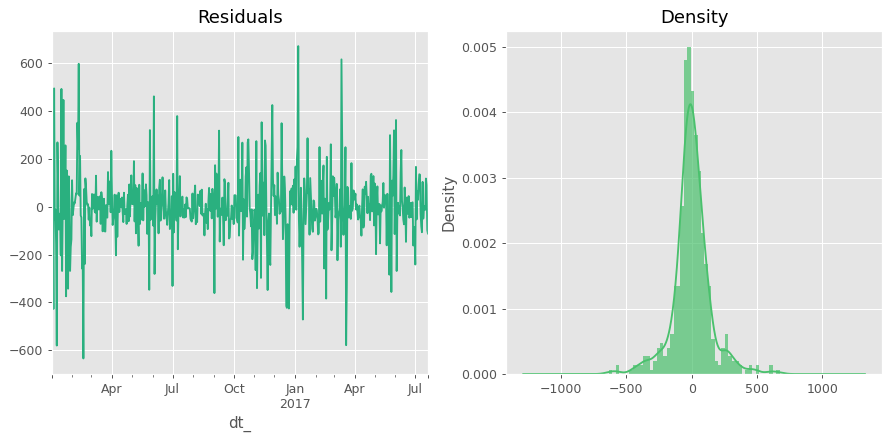

In [612]:
# Plot residual errors
plt.figure(figsize=(10,5), dpi=90)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
residuals1['err'].plot(title="Residuals", ax=ax1, color=[clrs[6]])
residuals1['err'].hist(density=True, bins=50, ax=ax2, alpha=.7, color=[clrs[7]])
residuals1['err'].plot(kind='kde', title='Density', ax=ax2, color=[clrs[7]])

plt.tight_layout()

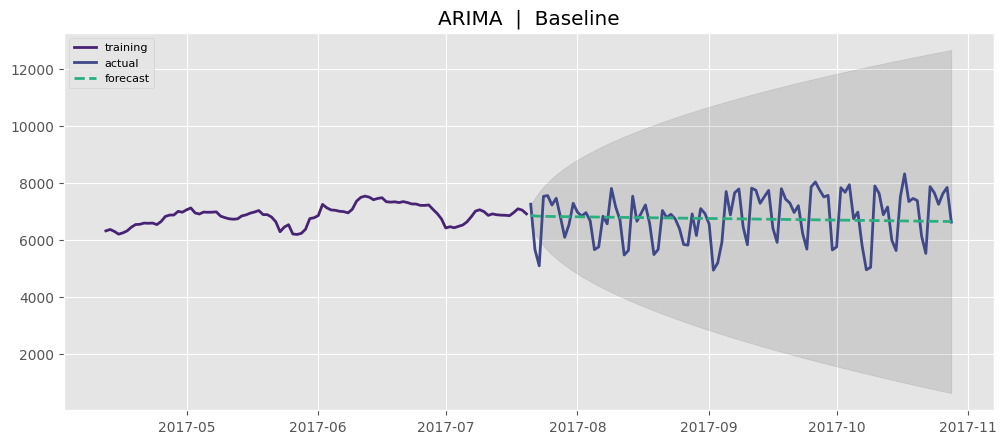

In [620]:
# Forecast: 192 forecasting values with 95% confidence
fc, se, conf = model1.forecast(100, alpha=0.01)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-100:], label='training', linewidth=2, color=clrs[2])
plt.plot(add.observed[-100:], label='actual', linewidth=2, color=clrs[4])
plt.plot(fc_series, label='forecast', linestyle='--', linewidth=2, color=clrs[6])
# plt.plot(y_hat, label='LSTM forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARIMA  |  Baseline')
plt.legend(loc='upper left', fontsize=8)

In [614]:
mean_absolute_error(add.observed[-100:], fc_series)

722.4885229859105

In [597]:
train.shape

(1331, 1)

### Model 2

In [601]:
model2 = ARIMA(train, order=(1, 2, 1))  
model2 = model2.fit(disp=0)  
print(model2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.cnt   No. Observations:                  565
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -3616.975
Method:                       css-mle   S.D. of innovations            145.169
Date:                Thu, 29 Oct 2020   AIC                           7241.949
Time:                        08:20:13   BIC                           7259.296
Sample:                    01-03-2016   HQIC                          7248.720
                         - 07-20-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0283      0.061      0.467      0.640      -0.091       0.147
ar.L1.D2.cnt     0.3863      0.039      9.927      0.000       0.310       0.463
ma.L1.D2.cnt    -1.0000      0.004   -223.16

In [602]:
# Plot residual errors
residuals2 = pd.DataFrame(model2.resid)
residuals2.columns = ['err']
residuals2['abs_err'] = abs(residuals2.err)

# residuals.head()

rmse = np.sqrt(residuals2.err.mean())
mae = residuals2.abs_err.mean()

print(f'Root mean squared error:  {rmse}')
print(f'Mean absolute error:  {mae}')

Root mean squared error:  1.7397716242012027
Mean absolute error:  96.59754725462815


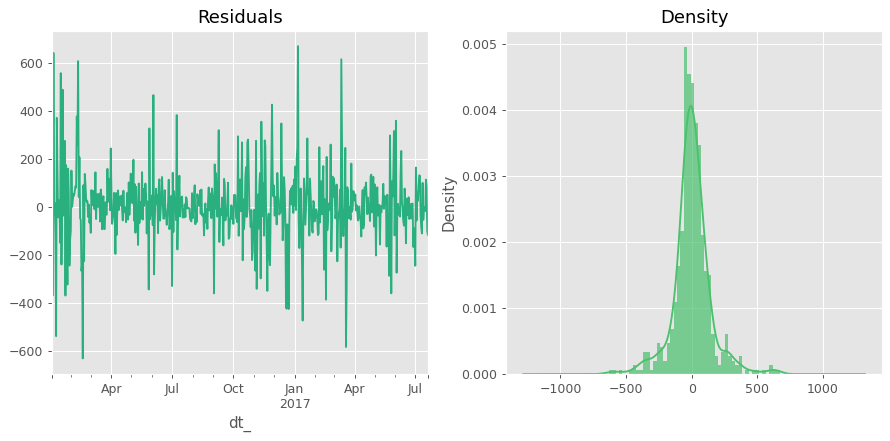

In [603]:
plt.figure(figsize=(10,5), dpi=90)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
residuals2['err'].plot(title="Residuals", ax=ax1, color=[clrs[6]])
residuals2['err'].hist(density=True, bins=50, ax=ax2, alpha=.7, color=[clrs[7]])
residuals2['err'].plot(kind='kde', title='Density', ax=ax2, color=[clrs[7]])

plt.tight_layout()

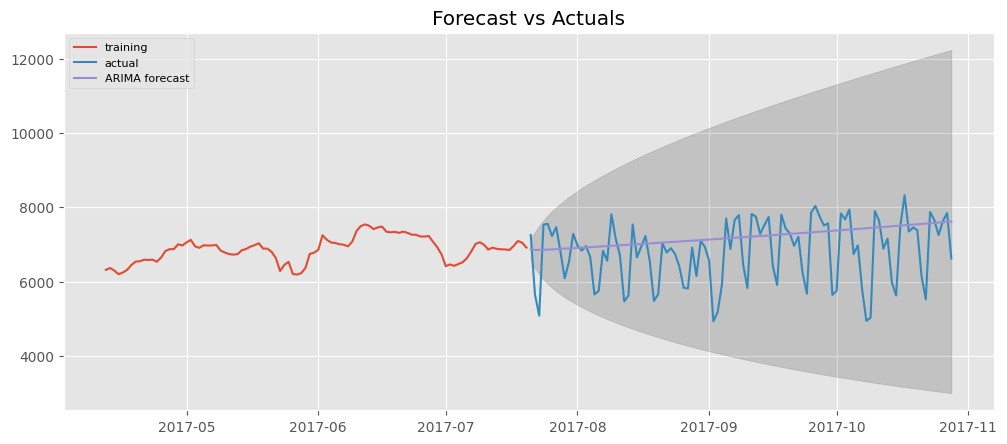

In [607]:
# Forecast: 192 forecasting values with 95% confidence
fc, se, conf = model2.forecast(100, alpha=0.05)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-100:], label='training')
plt.plot(add.observed[-100:], label='actual')
plt.plot(fc_series, label='ARIMA forecast')
# plt.plot(y_hat, label='LSTM forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [221]:
y_hat = y_pred_series
y_hat.index = fc_series.index

In [225]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

eval = pd.concat([test, fc_series, y_hat], axis=1)
eval.columns = ['y', 'y_arima', 'y_lstm']

In [228]:
mae_ar = mean_absolute_error(eval.y, eval.y_arima)
mse_ar = mean_squared_error(eval.y, eval.y_arima)

mae_l = mean_absolute_error(eval.y, eval.y_lstm)
mse_l = mean_squared_error(eval.y, eval.y_lstm)

print(f'ARIMA\tmae: {mae_ar}, mse: {mse_ar}')
print(f'LSTM\tmae: {mae_l}, mse: {mse_l}')

ARIMA	mae: 332.3065924694144, mse: 178581.06502320486
LSTM	mae: 108.39319186463742, mse: 19978.445111425117


In [224]:
eval.head()

cnt            0            1
dt_                                              
2019-08-24  6152.142857  6034.607481  6163.568848
2019-08-25  6140.571429  6021.852704  6201.609375
2019-08-26  6165.571429  6015.207613  6211.411621
2019-08-27  6097.428571  6011.358129  6218.774902
2019-08-28  6010.571429  6008.787739  6174.995605

## LSTM

In [184]:
trend.cnt.tolist()[:10]

[7843.969387755102,
 7747.280612244897,
 7650.591836734693,
 7184.714285714285,
 7499.999999999999,
 7566.714285714285,
 7579.142857142857,
 7425.428571428571,
 6784.428571428571,
 6806.428571428571]

In [189]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# define input sequence
raw_seq = trend.cnt.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [190]:
X[:5]

array([[7843.96938776, 7747.28061224, 7650.59183673, 7184.71428571,
        7500.        , 7566.71428571, 7579.14285714],
       [7747.28061224, 7650.59183673, 7184.71428571, 7500.        ,
        7566.71428571, 7579.14285714, 7425.42857143],
       [7650.59183673, 7184.71428571, 7500.        , 7566.71428571,
        7579.14285714, 7425.42857143, 6784.42857143],
       [7184.71428571, 7500.        , 7566.71428571, 7579.14285714,
        7425.42857143, 6784.42857143, 6806.42857143],
       [7500.        , 7566.71428571, 7579.14285714, 7425.42857143,
        6784.42857143, 6806.42857143, 6890.85714286]])

In [191]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [192]:
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
42/42 [==============================] - 0s 6ms/step - loss: 32038526.0000
Epoch 2/200
42/42 [==============================] - 0s 5ms/step - loss: 10703264.0000
Epoch 3/200
42/42 [==============================] - 0s 5ms/step - loss: 476319.7188
Epoch 4/200
42/42 [==============================] - 0s 5ms/step - loss: 184513.9531
Epoch 5/200
42/42 [==============================] - 0s 5ms/step - loss: 155540.0000
Epoch 6/200
42/42 [==============================] - 0s 5ms/step - loss: 147156.2969
Epoch 7/200
42/42 [==============================] - 0s 5ms/step - loss: 138541.2031
Epoch 8/200
42/42 [==============================] - 0s 5ms/step - loss: 122821.3516
Epoch 9/200
42/42 [==============================] - 0s 5ms/step - loss: 110232.3281
Epoch 10/200
42/42 [==============================] - 0s 5ms/step - loss: 122963.5312
Epoch 11/200
42/42 [==============================] - 0s 5ms/step - loss: 142900.7344
Epoch 12/200
42/42 [==============================] - 0s 5m

In [193]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

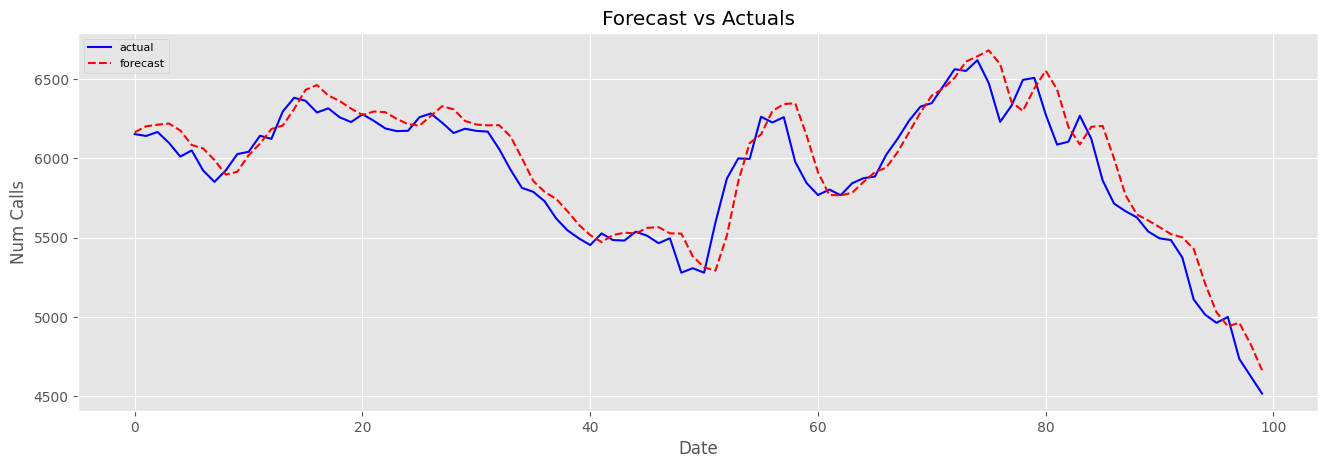

In [210]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [202]:
np.mean(abs(y_pred.flatten() - y_test))

108.39319186463742

In [206]:
np.sqrt(np.mean((y_pred.flatten() - y_test)**2))

141.3451276536447

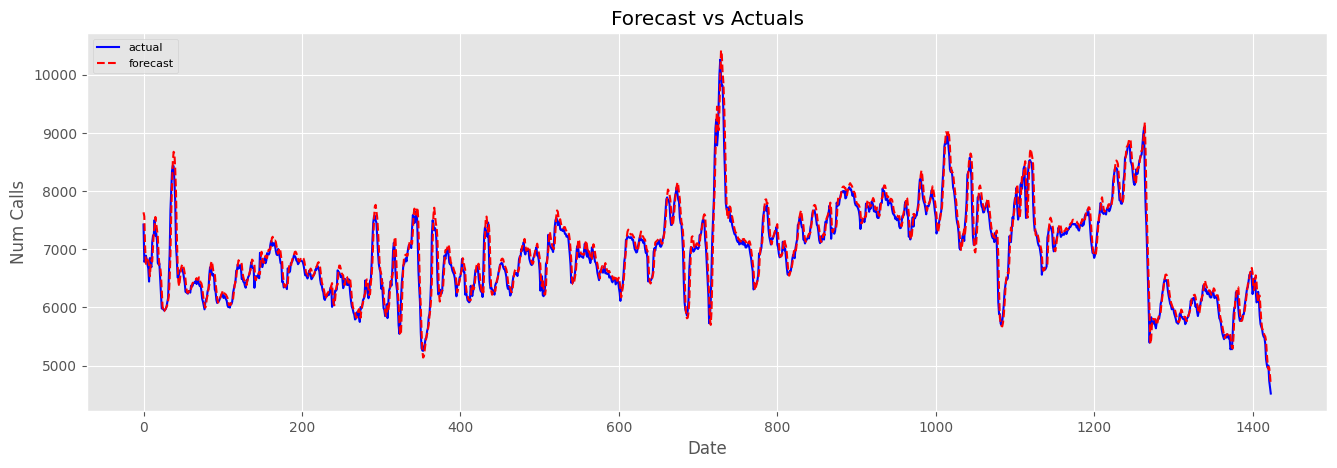

In [211]:
X_all = X.reshape((X.shape[0], X.shape[1], n_features))
y_pred_all = model.predict(X_all, verbose=0)
y_pred_all_1 = y_pred_all.reshape((y_pred_all.shape[0]))
y_pred_all_series = pd.Series(y_pred_all_1)
y_all = y.reshape((y.shape[0]))
y_all_series = pd.Series(y_all)
plot_forecast(y_all_series, y_pred_all_series, title='Daily 311 Calls')

In [214]:
y_train.shape, y_pred_all.shape

((1324,), (1424, 1))

In [216]:
np.mean(abs(y_pred_all[:-100].flatten() - y_train))

129.77169732631785

In [249]:
calls.head()

unique_key         created_date  ... cnt         dt_
0    42147537  2019-04-05 14:27:21  ...   1  2019-04-05
1    42147538  2019-04-05 23:00:01  ...   1  2019-04-05
2    42147539  2019-04-05 09:38:05  ...   1  2019-04-05
3    42147540  2019-04-05 09:49:18  ...   1  2019-04-05
4    42147541  2019-04-05 11:58:43  ...   1  2019-04-05

[5 rows x 18 columns]

In [250]:
def cat_desc(df, col):

  temp = df[col].value_counts().reset_index()
  nlevels = temp.shape[0]
  temp.columns = [col, 'cnt']
  tot = temp.cnt.sum()
  temp['perc'] = round(temp.cnt / tot, 4)

  if nlevels > 15:
      group_vals = ['other'] + temp.iloc[15:,1:].sum(axis=0).values.tolist()
      group_vals[-1] = round(group_vals[-1], 4)
      group = dict(zip(temp.columns.tolist(), group_vals))
      temp = temp[:15].append(group, ignore_index=True)
  print(f'Num `{col}` categories:  {nlevels}\n\n')
  
  return temp

In [ ]:
calls['noise_flg'] = calls.complaint_type.apply(lambda x: 1 if 'noise' in x.lower() else 0)

In [ ]:
noise_dly = calls[['dt_', 'noise_flg', 'cnt']].groupby(['dt_', 'noise_flg']).sum().reset_index()
noise_dly.head()

dt_  noise_flg   cnt
0  2016-01-01          0  2740
1  2016-01-01          1  1575
2  2016-01-02          0  3533
3  2016-01-02          1  1036
4  2016-01-03          0  3730

In [263]:
daily_n = noise_dly.set_index('dt_').pivot(columns='noise_flg')
daily_n.columns = ['num_other', 'num_noise']

daily_n.head()

num_other  num_noise
dt_                             
2016-01-01       2740       1575
2016-01-02       3533       1036
2016-01-03       3730       1076
2016-01-04       8369        619
2016-01-05      11460        575

In [268]:
data = data.join(daily_n)

Text(0.5, 0.98, 'Calls & Temperature')

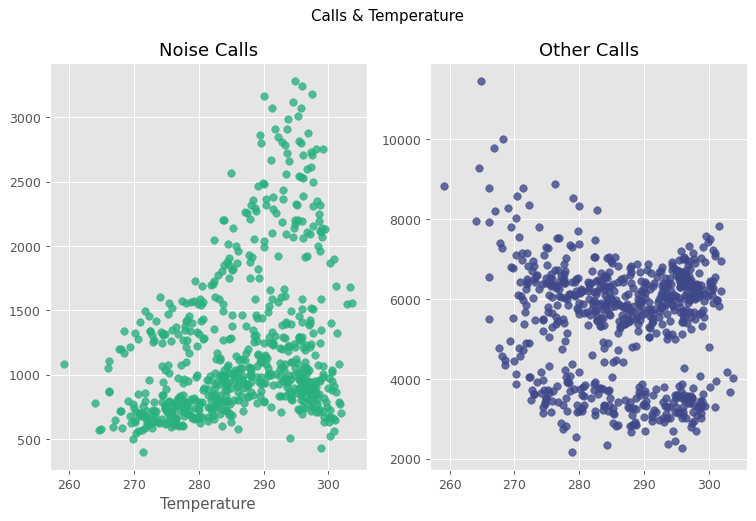

In [284]:
plt.figure(figsize=(10, 6), dpi=90)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.scatter(data.temp_mean, data.num_noise, alpha=.8, color=clrs[6])
ax1.set_title('Noise Calls')
ax1.set_xlabel('Temperature')

ax2.scatter(data.temp_mean, data.num_other, alpha=.8, color=clrs[4])
ax2.set_title('Other Calls')
ax2.set_xlabel('Temperature')

plt.suptitle('Calls & Temperature')

Text(0.5, 0.98, 'Calls & Humidity')

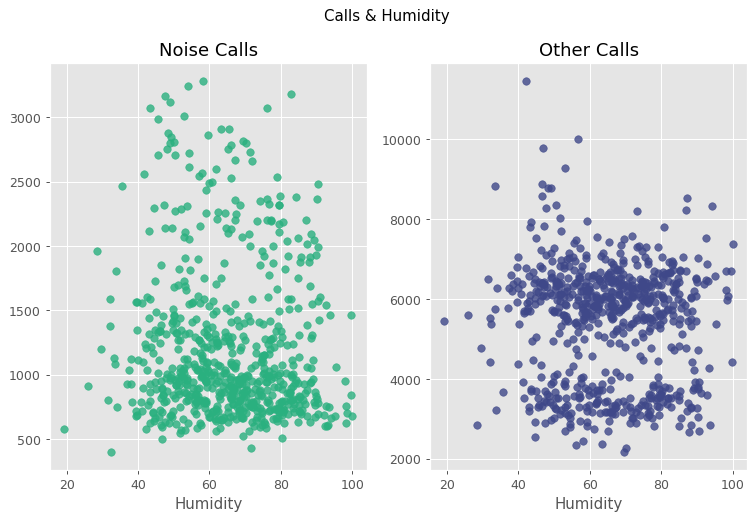

In [285]:
plt.figure(figsize=(10, 6), dpi=90)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.scatter(data.humid_mean, data.num_noise, alpha=.8, color=clrs[6])
ax1.set_title('Noise Calls')
ax1.set_xlabel('Humidity')

ax2.scatter(data.humid_mean, data.num_other, alpha=.8, color=clrs[4])
ax2.set_title('Other Calls')
ax2.set_xlabel('Humidity')

plt.suptitle('Calls & Humidity')

In [286]:
data.head()

cnt    temp_max  temp_median  ...  wnd_dir_mean  num_other  num_noise
dt_                                         ...                                    
2016-01-01   4315  279.540000   277.295140  ...    271.166667       2740       1575
2016-01-02   4569  277.150000   274.499211  ...    258.208333       3533       1036
2016-01-03   4806  279.950000   273.680139  ...    244.875000       3730       1076
2016-01-04   8988  276.632268   271.815000  ...    293.166667       8369        619
2016-01-05  12035  270.970000   263.653505  ...    305.375000      11460        575

[5 rows x 11 columns]

In [289]:
import seaborn as sns
plt_df = data[['temp_mean', 'humid_mean','num_other', 'num_noise']]

<Figure size 810x810 with 0 Axes>

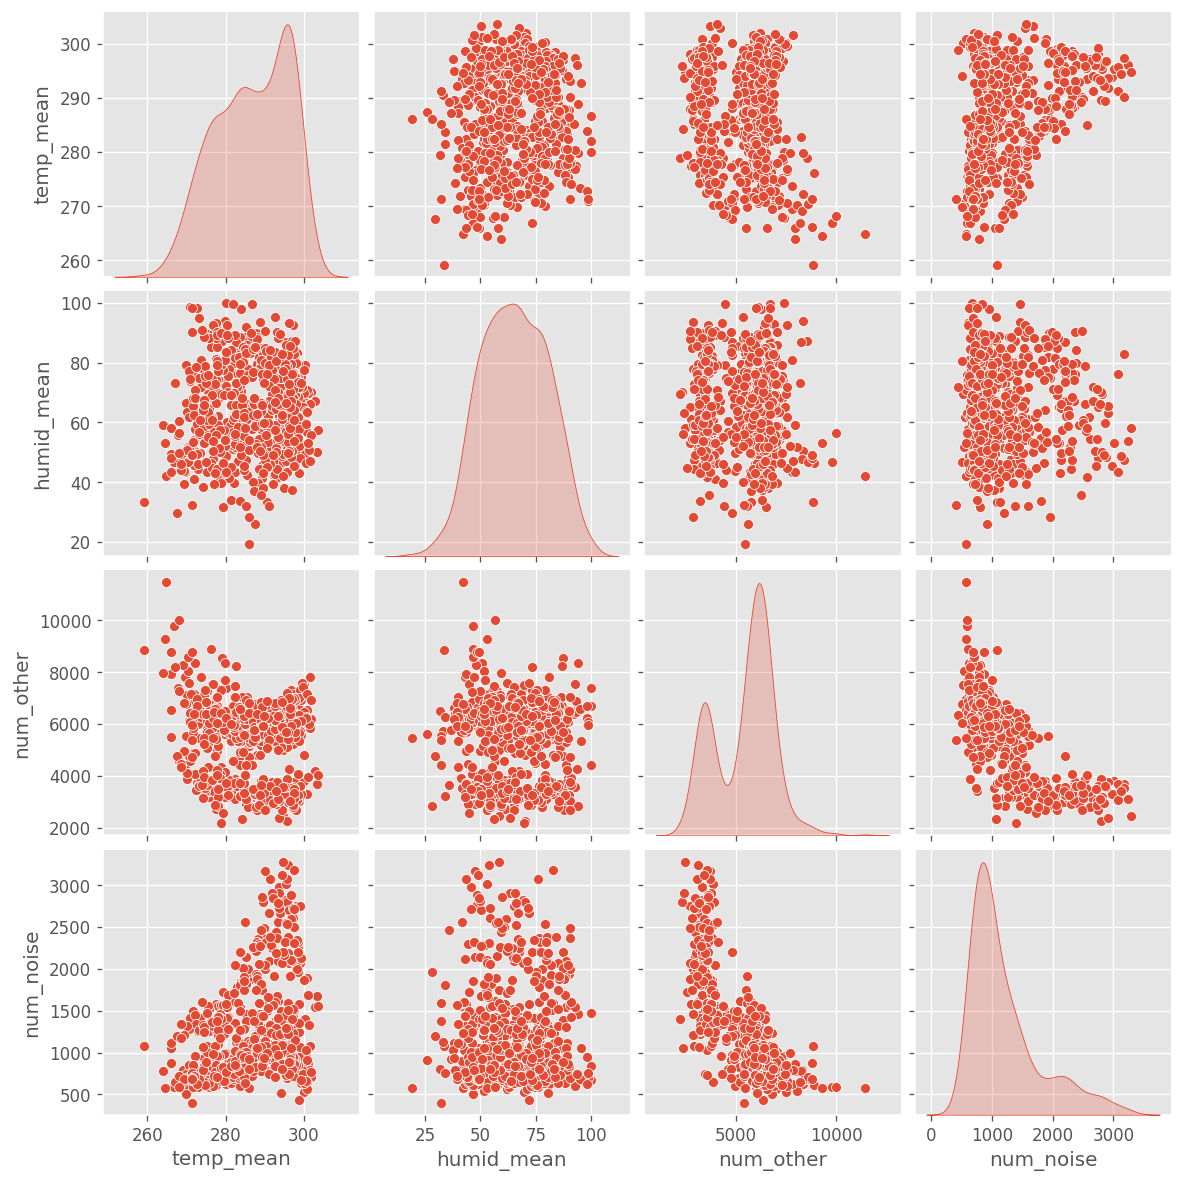

In [292]:
plt.figure(figsize=(9, 9), dpi=90)

sns.pairplot(plt_df, palette='viridis', diag_kind='kde')

In [291]:
plt_df.corr()

temp_mean  humid_mean  num_other  num_noise
temp_mean    1.000000    0.088265  -0.141484   0.323677
humid_mean   0.088265    1.000000  -0.057679  -0.074224
num_other   -0.141484   -0.057679   1.000000  -0.760228
num_noise    0.323677   -0.074224  -0.760228   1.000000

In [293]:
data.head()

cnt    temp_max  temp_median  ...  wnd_dir_mean  num_other  num_noise
dt_                                         ...                                    
2016-01-01   4315  279.540000   277.295140  ...    271.166667       2740       1575
2016-01-02   4569  277.150000   274.499211  ...    258.208333       3533       1036
2016-01-03   4806  279.950000   273.680139  ...    244.875000       3730       1076
2016-01-04   8988  276.632268   271.815000  ...    293.166667       8369        619
2016-01-05  12035  270.970000   263.653505  ...    305.375000      11460        575

[5 rows x 11 columns]

In [296]:
ssnl = seasonal_decompose(data['cnt'], model='additive', extrapolate_trend='freq')
ssnl_df = pd.concat([ssnl.seasonal, ssnl.trend, ssnl.resid, ssnl.observed], axis=1)
ssnl_df.columns = ['seasonal', 'trend', 'resid', 'actual_values']
ssnl_df.head()

seasonal        trend        resid  actual_values
dt_                                                             
2016-01-01   143.653100  7843.969388 -3672.622487           4315
2016-01-02 -1031.459943  7747.280612 -2146.820670           4569
2016-01-03 -1285.905935  7650.591837 -1558.685901           4806
2016-01-04   527.629618  7184.714286  1275.656096           8988
2016-01-05   695.897287  7500.000000  3839.102713          12035

Text(0.5, 1.0, 'Residual')

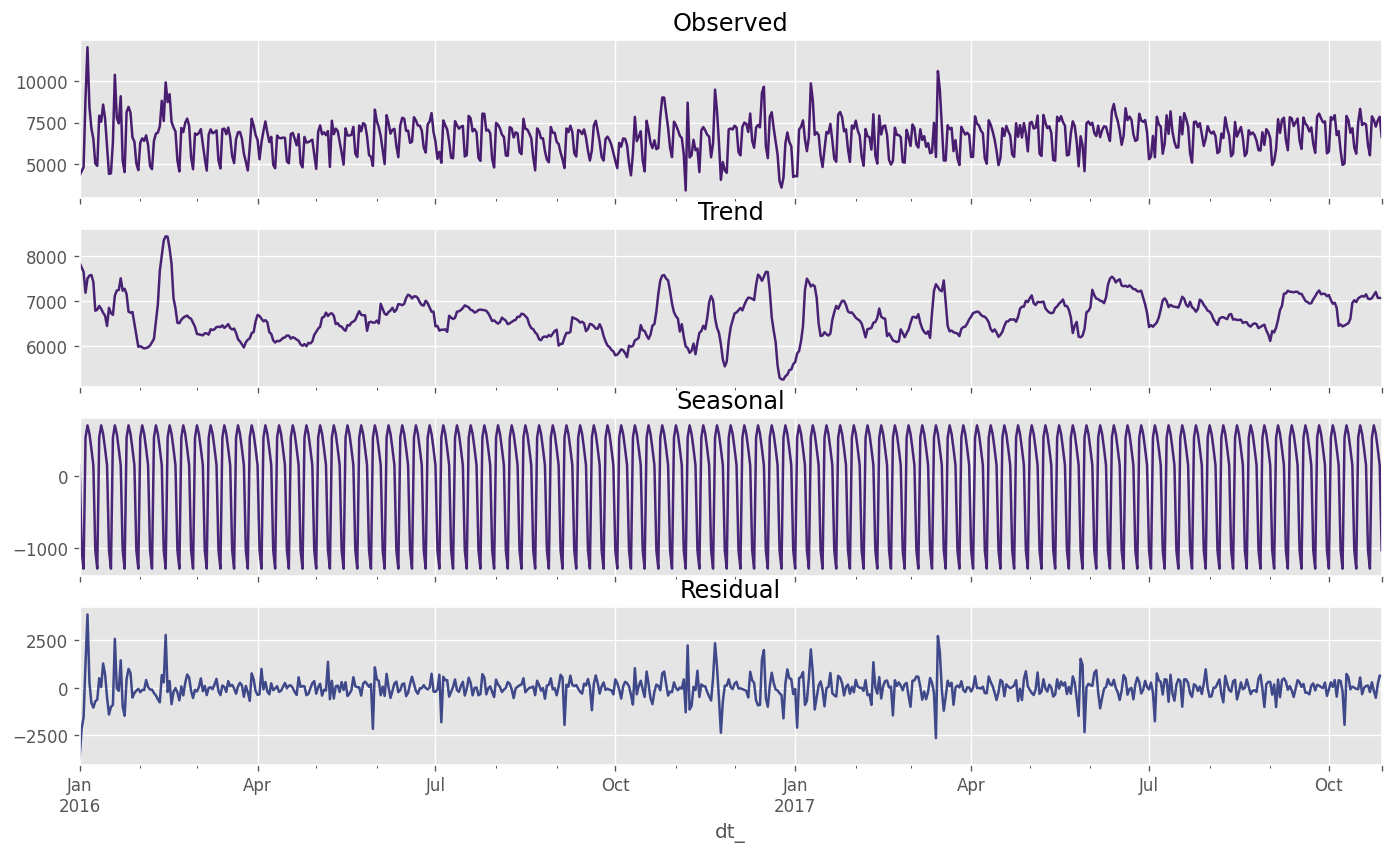

In [298]:
plt.rcParams.update({'figure.figsize':(14,8)})
fig, axes = plt.subplots(4, 1, sharex=True)

ssnl.observed.plot(ax=axes[0], legend=False, color=[clrs[1]])
axes[0].set_title('Observed')
ssnl.trend.plot(ax=axes[1], legend=False, color=[clrs[2]])
axes[1].set_title('Trend')
ssnl.seasonal.plot(ax=axes[2], legend=False, color=[clrs[3]])
axes[2].set_title('Seasonal')
ssnl.resid.plot(ax=axes[3], legend=False, color=[clrs[4]])
axes[3].set_title('Residual')

In [300]:
target = ssnl.trend

In [301]:
def split_sequence_target(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def split_sequence_feature(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X)

## Trend w/ Temp

In [303]:
# define input sequence
raw_seq = target.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X_target, y = split_sequence_target(raw_seq, n_steps)

X_temp = split_sequence_feature(data.temp_mean.tolist(), n_steps)

In [307]:
X = np.concatenate([X_target, X_temp], axis=1)
X.shape

(660, 14)

In [308]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [312]:
n_features = 1
ep = 400
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=1)

Epoch 1/1000
18/18 [==============================] - 0s 9ms/step - loss: 43937204.0000
Epoch 2/1000
18/18 [==============================] - 0s 8ms/step - loss: 43382088.0000
Epoch 3/1000
18/18 [==============================] - 0s 8ms/step - loss: 42687068.0000
Epoch 4/1000
18/18 [==============================] - 0s 8ms/step - loss: 40882048.0000
Epoch 5/1000
18/18 [==============================] - 0s 9ms/step - loss: 40734180.0000
Epoch 6/1000
18/18 [==============================] - 0s 9ms/step - loss: 26681114.0000
Epoch 7/1000
18/18 [==============================] - 0s 8ms/step - loss: 2239913.7500
Epoch 8/1000
18/18 [==============================] - 0s 8ms/step - loss: 138508.6094
Epoch 9/1000
18/18 [==============================] - 0s 9ms/step - loss: 54038.1836
Epoch 10/1000
18/18 [==============================] - 0s 9ms/step - loss: 37718.6641
Epoch 11/1000
18/18 [==============================] - 0s 9ms/step - loss: 36251.9531
Epoch 12/1000
18/18 [=====================

In [313]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

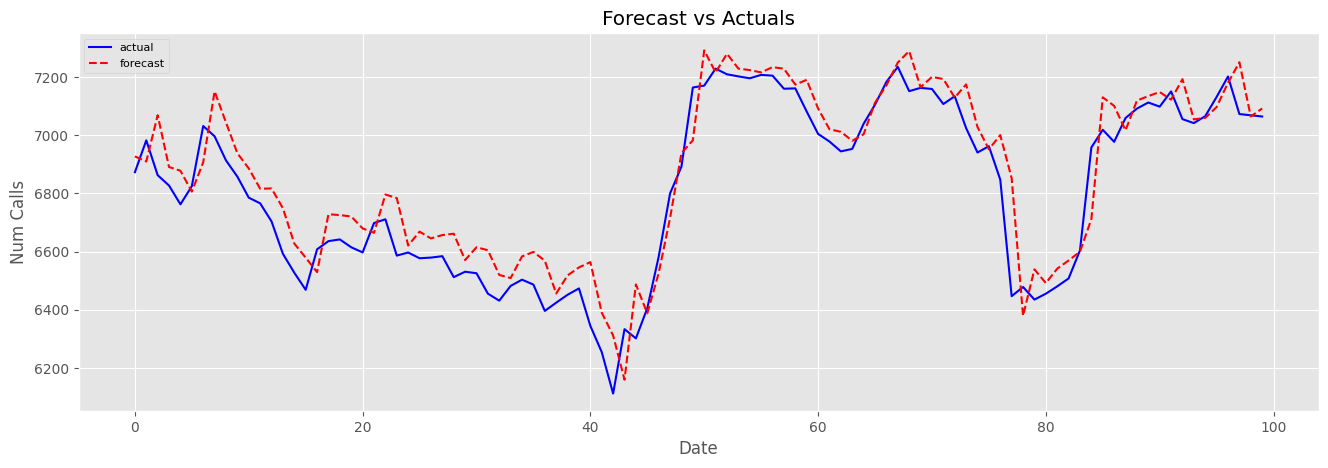

In [314]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [316]:
mean_absolute_error(y_test, y_pred)

83.4285691366392

In [317]:
mean_squared_error(y_test, y_pred)

11264.69310471162

## Trend No Temp

In [318]:
# define input sequence
raw_seq = target.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence_target(raw_seq, n_steps)

# X_temp = split_sequence_feature(data.temp_mean.tolist(), n_steps)

In [ ]:
# X = np.concatenate([X_target, X_temp], axis=1)
# X.shape

(660, 14)

In [319]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [321]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=1)

Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 22992184.0000
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 3093292.0000
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 293806.5000
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 626997.6875
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 407603.0625
Epoch 6/1000
18/18 [==============================] - 0s 5ms/step - loss: 240545.0625
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 158382.2500
Epoch 8/1000
18/18 [==============================] - 0s 5ms/step - loss: 136670.4062
Epoch 9/1000
18/18 [==============================] - 0s 5ms/step - loss: 92297.9219
Epoch 10/1000
18/18 [==============================] - 0s 5ms/step - loss: 148802.6094
Epoch 11/1000
18/18 [==============================] - 0s 5ms/step - loss: 141599.1562
Epoch 12/1000
18/18 [=============================

In [322]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

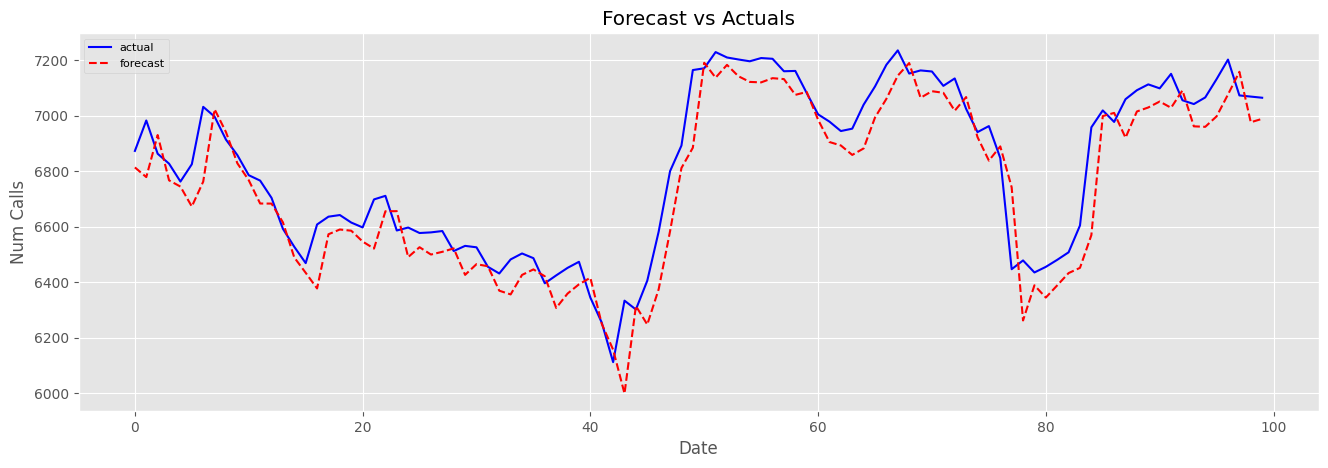

In [323]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [324]:
mean_absolute_error(y_test, y_pred)

88.55708466198958

In [325]:
mean_squared_error(y_test, y_pred)

13089.882871127536

## Trend all weather

In [345]:
data.head()

cnt    temp_max  temp_median  ...  wnd_dir_mean  num_other  num_noise
dt_                                         ...                                    
2016-01-01   4315  279.540000   277.295140  ...    271.166667       2740       1575
2016-01-02   4569  277.150000   274.499211  ...    258.208333       3533       1036
2016-01-03   4806  279.950000   273.680139  ...    244.875000       3730       1076
2016-01-04   8988  276.632268   271.815000  ...    293.166667       8369        619
2016-01-05  12035  270.970000   263.653505  ...    305.375000      11460        575

[5 rows x 11 columns]

In [334]:
# define input sequence
raw_seq = target.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence_target(raw_seq, n_steps)

X_temp = split_sequence_feature(data.temp_mean.tolist(), n_steps)
X_humid = split_sequence_feature(data.humid_mean.tolist(), n_steps)
X_pres = split_sequence_feature(data.pres_mean.tolist(), n_steps)
X_wnd_spd = split_sequence_feature(data.wnd_spd_mean.tolist(), n_steps)
X_wnd_dir = split_sequence_feature(data.wnd_dir_mean.tolist(), n_steps)

X = np.concatenate([X_target, X_temp, X_pres, X_wnd_spd, X_wnd_dir], axis=1)
X.shape

In [335]:
# X = np.concatenate([X_target, X_temp, X_pres, X_wnd_spd, X_wnd_dir], axis=1)
# X.shape

(660, 35)

In [336]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [337]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=1)

Epoch 1/1000
18/18 [==============================] - 0s 20ms/step - loss: 36112064.0000
Epoch 2/1000
18/18 [==============================] - 0s 20ms/step - loss: 29138202.0000
Epoch 3/1000
18/18 [==============================] - 0s 19ms/step - loss: 92903680.0000
Epoch 4/1000
18/18 [==============================] - 0s 20ms/step - loss: 612939840.0000
Epoch 5/1000
18/18 [==============================] - 0s 21ms/step - loss: 118181024.0000
Epoch 6/1000
18/18 [==============================] - 0s 20ms/step - loss: 8393700.0000
Epoch 7/1000
18/18 [==============================] - 0s 19ms/step - loss: 36500160.0000
Epoch 8/1000
18/18 [==============================] - 0s 21ms/step - loss: 10541456.0000
Epoch 9/1000
18/18 [==============================] - 0s 19ms/step - loss: 4795627.5000
Epoch 10/1000
18/18 [==============================] - 0s 20ms/step - loss: 251241.0312
Epoch 11/1000
18/18 [==============================] - 0s 19ms/step - loss: 564179.0625
Epoch 12/1000
18/18 [==

In [338]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

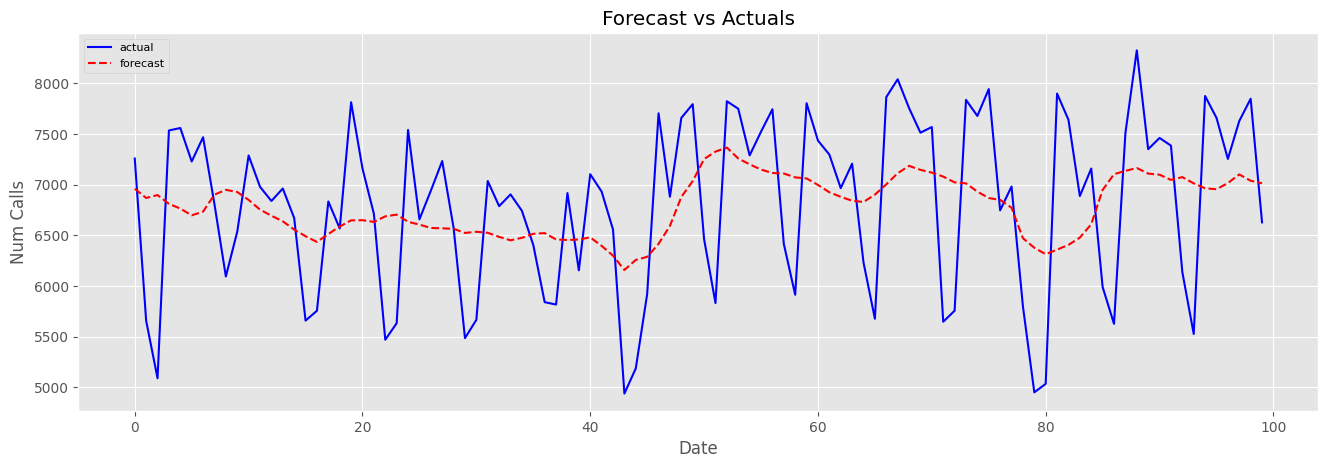

In [346]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
# y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(data[-100:].cnt.values)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [340]:
mean_absolute_error(y_test, y_pred)

78.95779476243607

In [341]:
mean_squared_error(y_test, y_pred)

11253.678041628855

In [627]:
type(data)

pandas.core.frame.DataFrame

## Daily w/ types

In [568]:
# define input sequence
raw_seq = data.cnt.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X_t, y = split_sequence_target(raw_seq, n_steps)

X_noise = split_sequence_feature(data.num_noise.tolist(), 1)
X_other = split_sequence_feature(data.num_other.tolist(), 1)

X = np.concatenate([X_t, X_noise[6:], X_other[6:]], axis=1)
X.shape

(660, 9)

In [569]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [570]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=0)

In [571]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

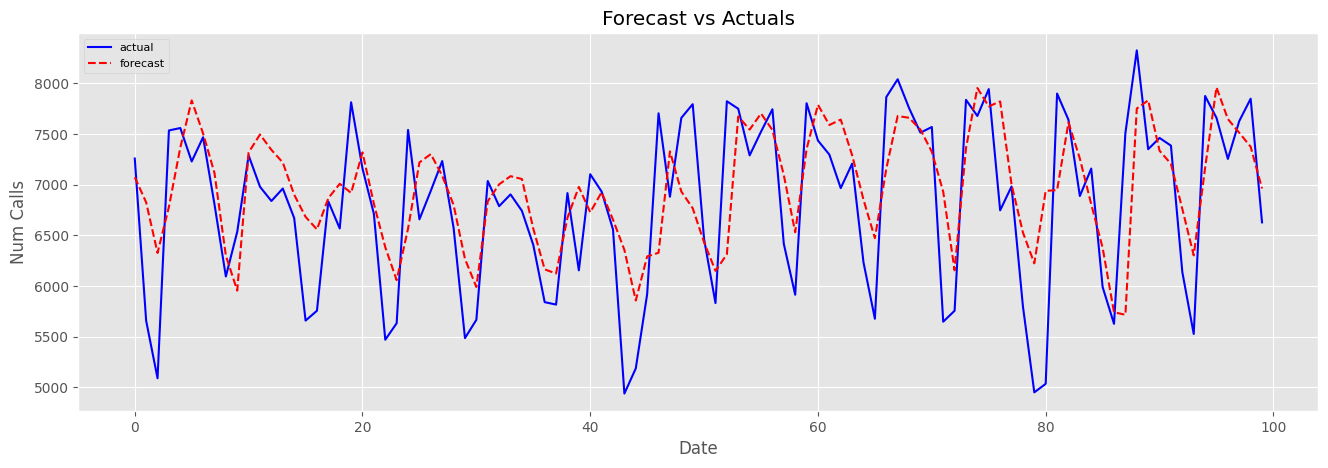

In [572]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [573]:
mean_absolute_error(y_test, y_pred)

495.2440087890625

In [ ]:
mean_squared_error(y_test, y_pred)

294616.70252751827

In [574]:
clrs

array([[0.281446, 0.08432 , 0.407414],
       [0.283197, 0.11568 , 0.436115],
       [0.282884, 0.13592 , 0.453427],
       [0.28229 , 0.145912, 0.46151 ],
       [0.246811, 0.283237, 0.535941],
       [0.119483, 0.614817, 0.537692],
       [0.166383, 0.690856, 0.496502],
       [0.288921, 0.758394, 0.428426],
       [0.545524, 0.838039, 0.275626],
       [0.751884, 0.874951, 0.143228]])

## Daily No Temp

In [621]:
# define input sequence
raw_seq = data.cnt.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence_target(raw_seq, n_steps)

# X_temp = split_sequence_feature(data.temp_mean.tolist(), n_steps)

In [622]:
# X = np.concatenate([X_target, X_temp], axis=1)
X.shape

(660, 7)

In [623]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [624]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=0)

In [628]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

# HERE

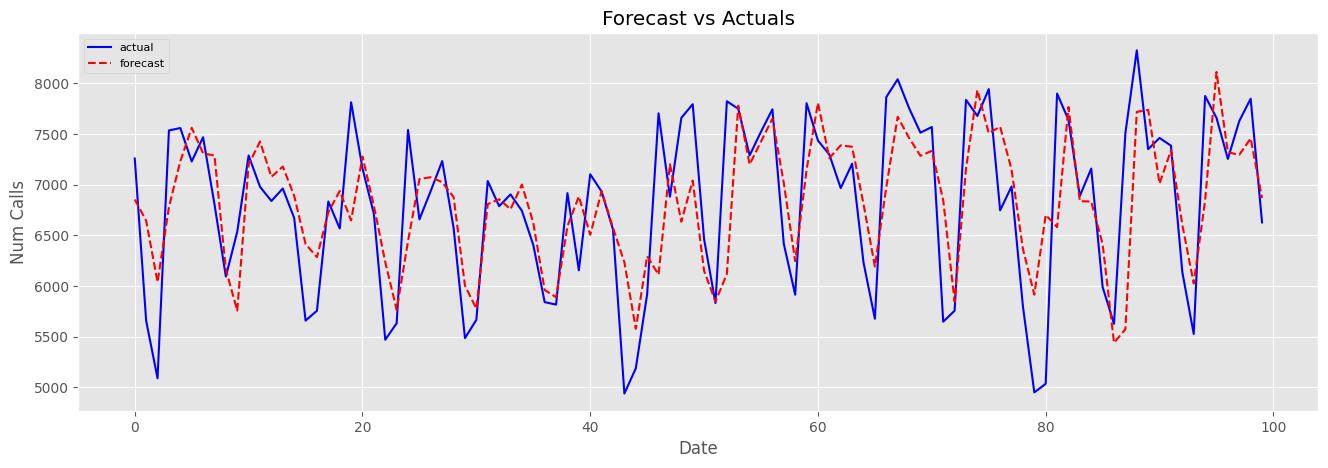

In [629]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

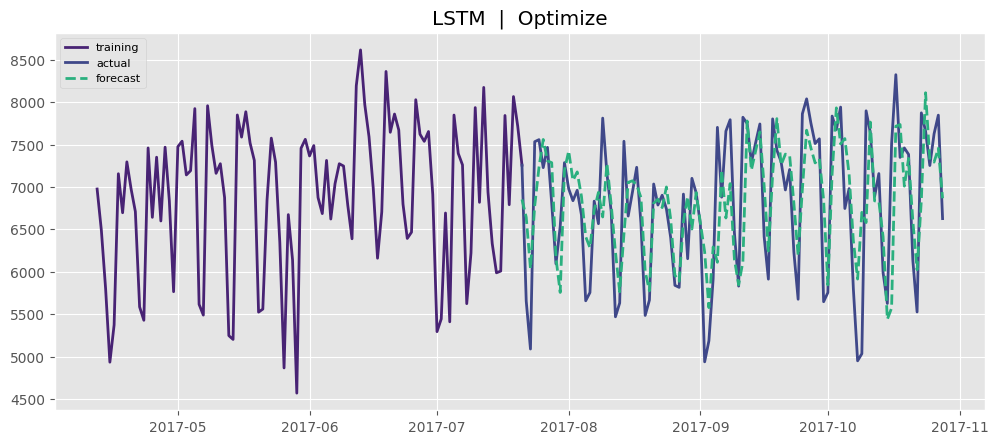

In [639]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data[-200:-99]['cnt'], label='training', linewidth=2, color=clrs[2])
plt.plot(dts, y_test_series, label='actual', linewidth=2, color=clrs[4])
plt.plot(dts, y_pred_series, label='forecast', linestyle='--', linewidth=2, color=clrs[6])

plt.title('LSTM  |  Optimize')
plt.legend(loc='upper left', fontsize=8)

In [631]:
mean_absolute_error(y_test, y_pred)

401.913232421875

In [633]:
y_test_series.head()

0    7257
1    5656
2    5089
3    7534
4    7558
dtype: int64

In [635]:
dts = data[-100:].index

In [637]:
data[-200:-100]['cnt']

dt_
2017-04-12    6976
2017-04-13    6488
2017-04-14    5799
2017-04-15    4934
2017-04-16    5373
              ... 
2017-07-16    6008
2017-07-17    7843
2017-07-18    6791
2017-07-19    8066
2017-07-20    7717
Name: cnt, Length: 100, dtype: int64

In [436]:
mean_squared_error(y_test, y_pred)

294616.70252751827

In [414]:
def plot_training(hist):
    plt.figure(figsize=(12,5), dpi=90)
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)

    ax1.plot(hist['loss'])
    ax1.set_title('Loss')

    ax2.plot(hist['mean_squared_error'])
    ax2.set_title('MSE')

In [437]:
# hstry = model.history.history
# plot_training(hstry)

## Daily w/ Temp

In [562]:
# define input sequence
raw_seq = data.cnt.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X_t, y = split_sequence_target(raw_seq, n_steps)

X_temp = split_sequence_feature(data.temp_mean.tolist(), 1)
X_pres = split_sequence_feature(data.pres_mean.tolist(), 1)

X = np.concatenate([X_t, X_temp[6:], X_pres[6:]], axis=1)
X.shape

(660, 9)

In [563]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [564]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, validation_split=0.15, verbose=0)

In [565]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

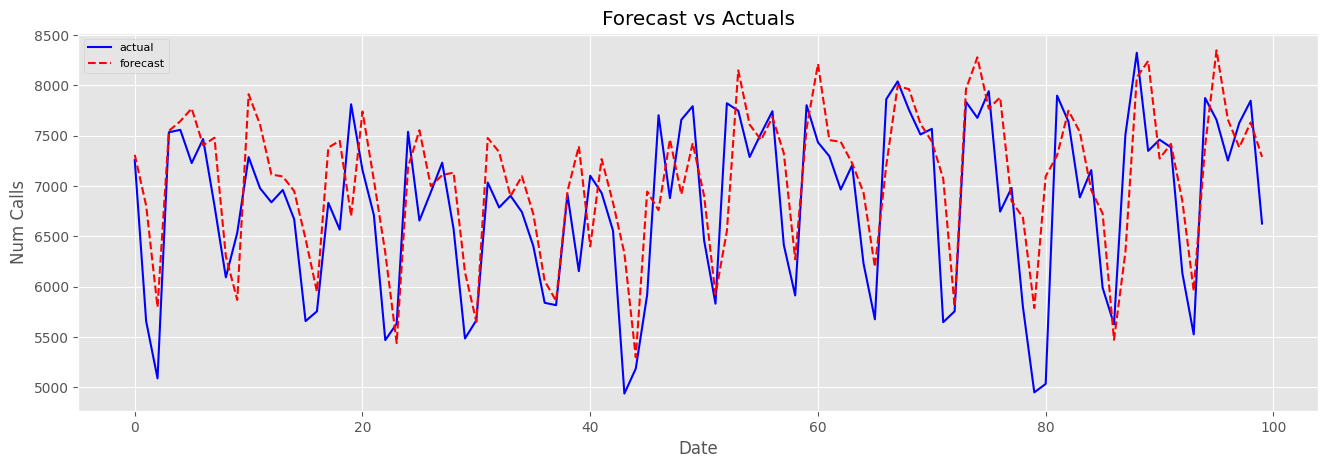

In [566]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [567]:
mean_absolute_error(y_test, y_pred)

481.907431640625

In [450]:
mean_squared_error(y_test, y_pred)

543450.258660903

In [451]:
target.shape

(667,)

## Noise No Temp

In [547]:
# define input sequence
raw_seq = data.num_noise.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence_target(raw_seq, n_steps)

X.shape

(660, 7)

In [548]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [549]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=0)

In [550]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

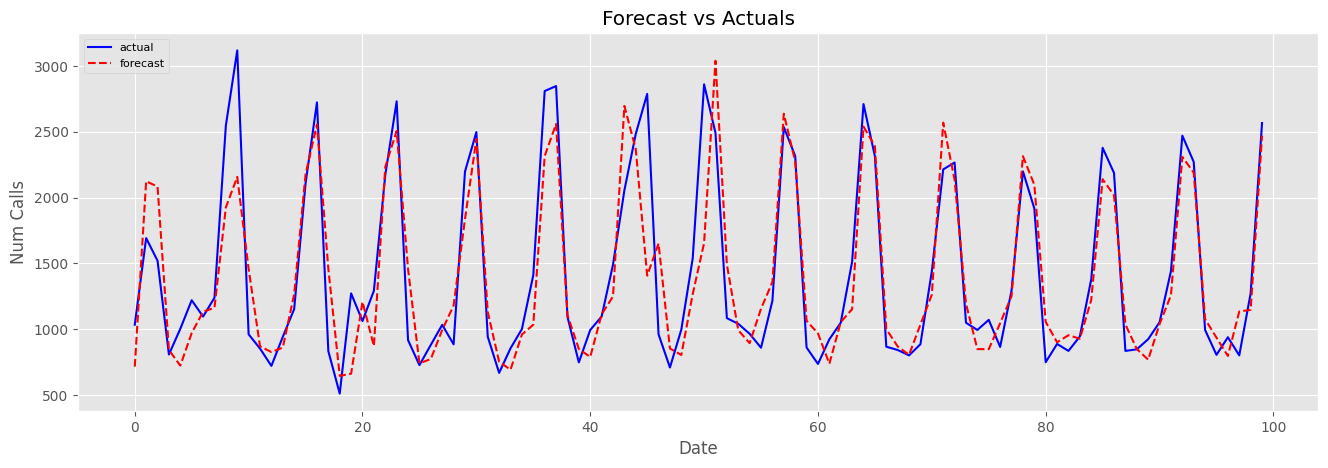

In [551]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [552]:
mean_absolute_error(y_test, y_pred)

227.36215209960938

In [ ]:
mean_squared_error(y_test, y_pred)

294616.70252751827

In [553]:
y_noise = y_pred

## Noise w/ Temp

In [498]:
# define input sequence
raw_seq = data.num_noise.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X_seq, y = split_sequence_target(raw_seq, n_steps)

X_temp = split_sequence_feature(data.temp_mean, 1)
X_humid = split_sequence_feature(data.humid_mean.tolist(), 1)
X_pres = split_sequence_feature(data.pres_mean.tolist(), 1)
X_wnd_spd = split_sequence_feature(data.wnd_spd_mean.tolist(), 1)
X_wnd_dir = split_sequence_feature(data.wnd_dir_mean.tolist(), 1)

X = np.concatenate([X_seq, X_temp[6:], X_humid[6:], X_pres[6:], X_wnd_spd[6:], X_wnd_dir[6:]], axis=1)
X.shape

(660, 12)

In [499]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [500]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=0)

In [501]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

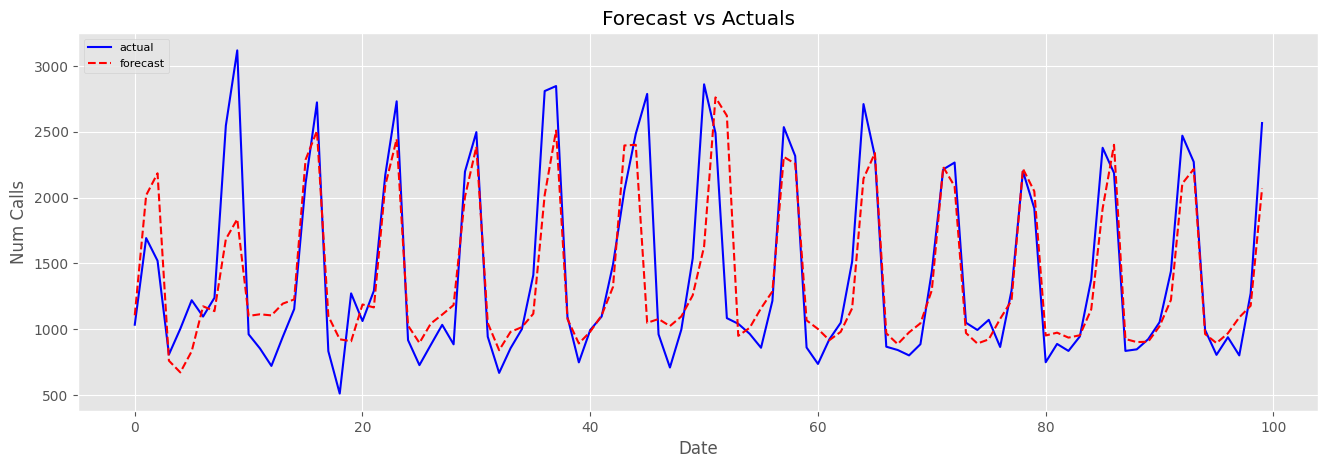

In [502]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [503]:
mean_absolute_error(y_test, y_pred)

236.80568725585937

In [504]:
mean_squared_error(y_test, y_pred)

144072.6243173697

## Other No Temp

In [505]:
# define input sequence
raw_seq = data.num_other.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence_target(raw_seq, n_steps)

X.shape

(660, 7)

In [506]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [507]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=0)

In [508]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

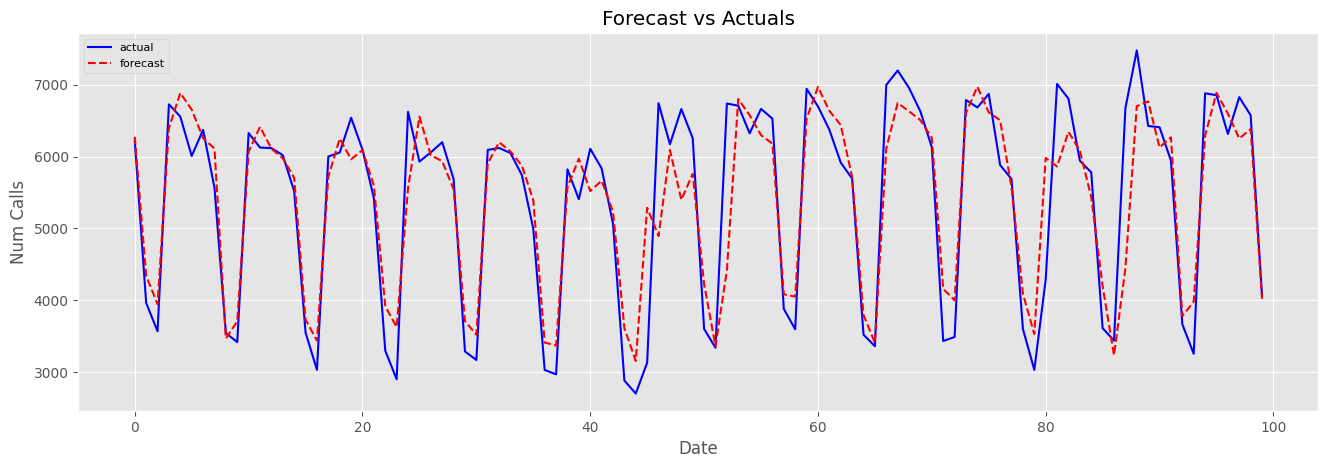

In [509]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [510]:
mean_absolute_error(y_test, y_pred)

435.526005859375

In [511]:
mean_squared_error(y_test, y_pred)

390930.75855841994

## Other w/ Temp

In [538]:
# define input sequence
raw_seq = data.num_other.tolist()
# choose a number of time steps
n_steps = 7
# split into samples
X_seq, y = split_sequence_target(raw_seq, n_steps)

X_temp = split_sequence_feature(data.temp_mean, 1)
# X_humid = split_sequence_feature(data.humid_mean.tolist(), 1)
# X_pres = split_sequence_feature(data.pres_mean.tolist(), 1)
# X_wnd_spd = split_sequence_feature(data.wnd_spd_mean.tolist(), 1)
# X_wnd_dir = split_sequence_feature(data.wnd_dir_mean.tolist(), 1)

X = np.concatenate([X_seq, X_temp[6:]], axis=1)
# X = np.concatenate([X_seq, X_temp[6:], X_humid[6:], X_pres[6:], X_wnd_spd[6:], X_wnd_dir[6:]], axis=1)
X.shape

(660, 8)

In [539]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [540]:
n_features = 1
ep = 1000
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=ep, verbose=0)

In [541]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

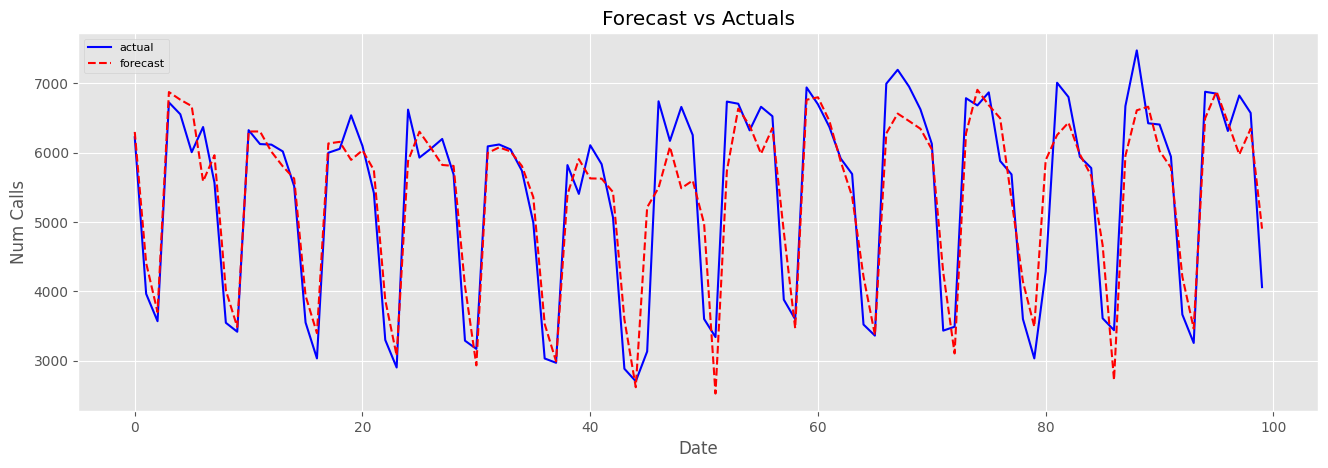

In [542]:
def plot_forecast(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Num Calls', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)
plot_forecast(y_test_series, y_pred_series, title='Daily Calls')

In [546]:
y_other = y_pred

In [554]:
y_hat = y_other + y_noise

In [557]:
y_hat.shape

(100, 1)

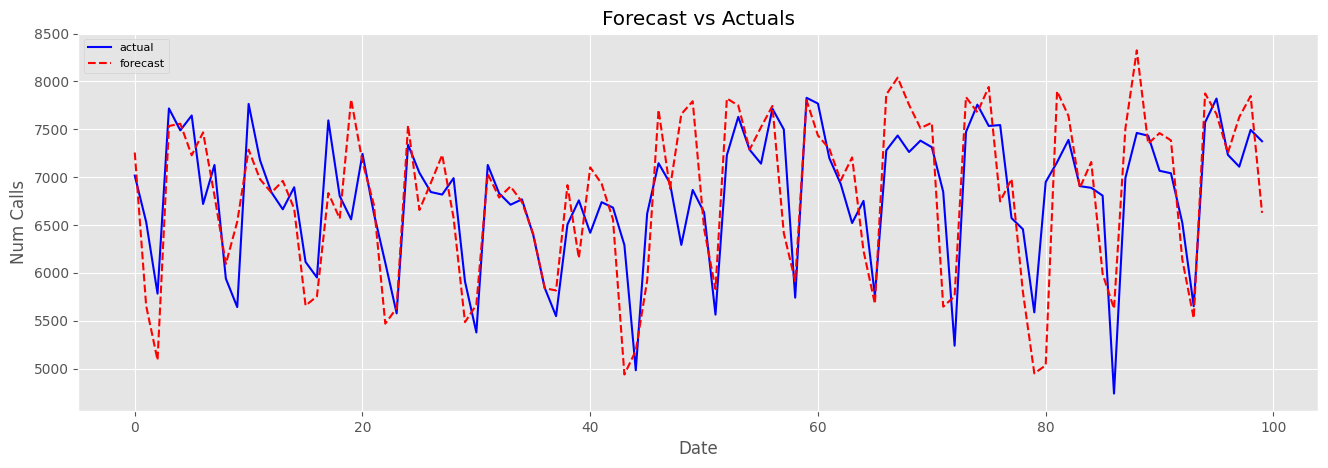

In [560]:
y_hat_1 = y_hat.reshape((y_hat.shape[0]))
y_hat_series = pd.Series(y_hat_1)
y_1 = data[-100:].cnt.values.reshape((y_test.shape[0]))
y_series = pd.Series(y_1)
plot_forecast(y_hat_series, y_series, title='Daily Calls')

In [561]:
mean_absolute_error(y_series, y_hat_series)

410.60025390625

In [463]:
data.head(10)

cnt    temp_max  temp_median  ...  wnd_dir_mean  num_other  num_noise
dt_                                         ...                                    
2016-01-01   4315  279.540000   277.295140  ...    271.166667       2740       1575
2016-01-02   4569  277.150000   274.499211  ...    258.208333       3533       1036
2016-01-03   4806  279.950000   273.680139  ...    244.875000       3730       1076
2016-01-04   8988  276.632268   271.815000  ...    293.166667       8369        619
2016-01-05  12035  270.970000   263.653505  ...    305.375000      11460        575
2016-01-06   8429  277.820000   267.345069  ...    238.583333       7800        629
2016-01-07   7151  280.080000   271.990000  ...    222.000000       6508        643
2016-01-08   6522  279.430000   274.532774  ...     68.125000       5813        709
2016-01-09   5036  280.821619   278.401745  ...     66.458333       3694       1342
2016-01-10   4893  288.750000   281.708940  ...    116.125000       3779       1114

[10 rows x 11 columns]

In [464]:
y_train[:10]

array([ 709, 1342, 1114,  627,  567,  545,  635,  779, 1222, 1261])

In [465]:
X_train[0]

array([[1575],
       [1036],
       [1076],
       [ 619],
       [ 575],
       [ 629],
       [ 643]])

In [332]:
# list all data in history
# print(model.history.on_train_end())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

None


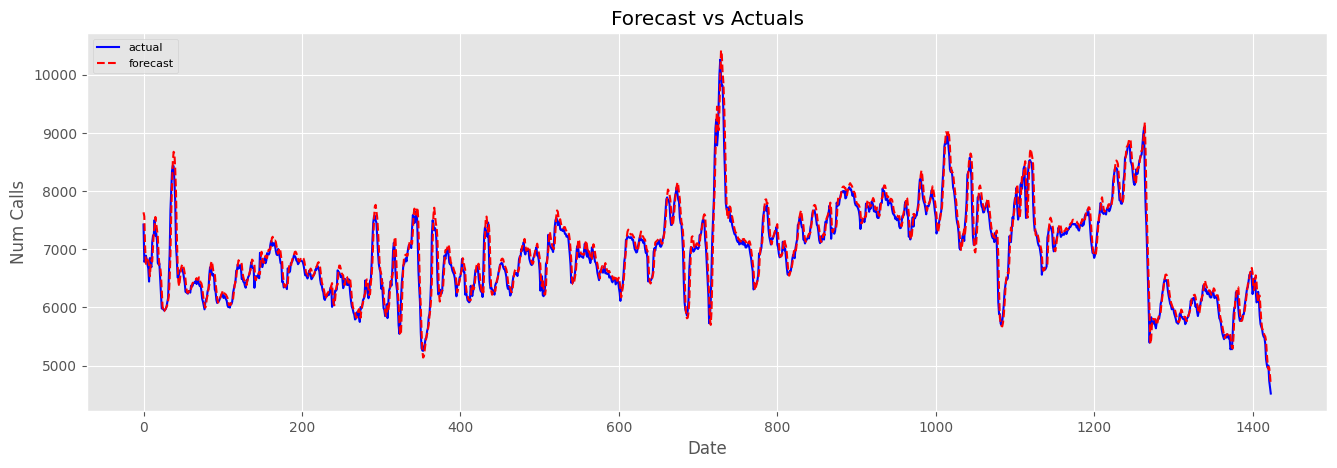

In [ ]:
X_all = X.reshape((X.shape[0], X.shape[1], n_features))
y_pred_all = model.predict(X_all, verbose=0)
y_pred_all_1 = y_pred_all.reshape((y_pred_all.shape[0]))
y_pred_all_series = pd.Series(y_pred_all_1)
y_all = y.reshape((y.shape[0]))
y_all_series = pd.Series(y_all)
plot_forecast(y_all_series, y_pred_all_series, title='Daily 311 Calls')